<a href="https://colab.research.google.com/github/amanoj03/Machine-Learning/blob/master/MNIST-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [0]:
mnist = keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

In [0]:
clas_names = ["T-Shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle Boot"]

In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
type(train_images)

numpy.ndarray

In [0]:
len(train_labels)

60000

In [0]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [0]:
test_images.shape

(10000, 28, 28)

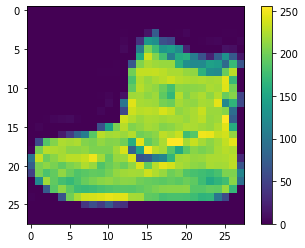

In [0]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_labels[0]

9

In [0]:
train_images = train_images/255.0
test_images = test_images/255.0

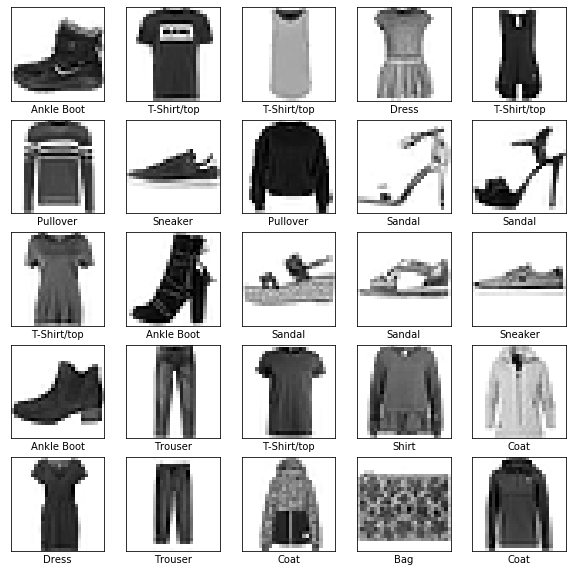

In [0]:
plt.figure(figsize=(10,10))

for i in range(25):

  plt.subplot(5,5,i+1)

  plt.xticks([])

  plt.yticks([])

  plt.grid(False)

  plt.imshow(train_images[i], cmap = plt.cm.binary)

  plt.xlabel(clas_names[train_labels[i]])

plt.show()

In [0]:
model = keras.Sequential([
                          keras.layers.Flatten(
                              input_shape=(28,28)),
                          keras.layers.Dense(128,
                                             activation='relu'),
                          keras.layers.Dense(10,activation=
                                             "softmax")])

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images,train_labels,epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 94us/sample - loss: 0.4912 - acc: 0.8266
Epoch 2/5
60000/60000 [==============================] - 5s 78us/sample - loss: 0.3686 - acc: 0.8666
Epoch 3/5
60000/60000 [==============================] - 5s 79us/sample - loss: 0.3335 - acc: 0.8791
Epoch 4/5
60000/60000 [==============================] - 5s 79us/sample - loss: 0.3091 - acc: 0.8861
Epoch 5/5
60000/60000 [==============================] - 5s 80us/sample - loss: 0.2926 - acc: 0.8914


In [0]:
test_loss,test_acc = model.evaluate(test_images,test_labels,verbose=1)
print("Accuracy: ",test_acc)

10000/10000 [==============================] - 1s 56us/sample - loss: 0.3603 - acc: 0.8723
Accuracy:  0.8723


In [0]:
predictions=model.predict(test_images)

In [0]:
predictions[0]

array([3.1515901e-07, 8.3621945e-09, 4.1958111e-07, 1.6325048e-08,
       1.1620159e-06, 2.0973298e-03, 2.6259306e-06, 2.3544088e-02,
       9.0249723e-06, 9.7434491e-01], dtype=float32)

In [0]:
clas_names[np.argmax(predictions[0])]

'Ankle Boot'